#Diplomado de Data Science & Artificial Intelligence
##Módulo de Aprendizaje Supervisado
###Predicción de Supervivientes del Titanic





In [1]:
# importar la biblioteca para análisis de datos
import numpy as np

# importar la biblioteca para graficación
import matplotlib.pyplot as plt
%matplotlib inline

# importar la biblioteca para manipulación y tratamiento de datos
import pandas as pd

## Lectura y preprocesamiento del conjunto de datos

In [2]:
# leer el conjunto de datos a utilizar
df = pd.read_csv('Titanic_preparar.csv')

# mostrar las primeras 5 líneas del dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# mostrar la información condensada del contenido del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# determinar la cantidad de datos faltantes en las columnas
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
# determinar la cantidad de datos distintos en cada columna
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# estadísticas sobre el atributo de edad
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

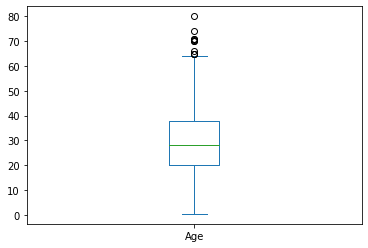

In [8]:
# ilustra los datos de edad con un gráfico de caja
df['Age'].plot(kind='box')

In [9]:
# determinar los puntos centrales de Age
print("Moda=", df['Age'].mode())
print("Media=", df['Age'].mean())
print("Mediana=", df['Age'].median())

Moda= 0    24.0
dtype: float64
Media= 29.69911764705882
Mediana= 28.0


In [10]:
# sustituye datos faltantes de edad con la mediana
df['Age'].fillna(28, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
# elimina columnas Id del pasajero, Nombre, Boleto y Cabina
df2 = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

# mostrar la información condensada del nuevo dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
# introduce variables dummy para los atributos de sexo y puerto de embarque
df3 = pd.get_dummies(df2,columns=['Sex','Embarked'])

# muestra las primeras 5 líneas del dataframe resultante
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
# elimina una variable dummy para el atributo de sexo y renombra la columna
df3 = df3.drop(columns=['Sex_male'])
df3 = df3.rename(columns={"Sex_female": "Sex"})

# muestra las primeras 5 líneas del dataframe resultante
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1


In [17]:
# Normaliza los datos utilizando un escalador de datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

dataScaler = RobustScaler()
scaler = dataScaler.fit(df3)
dataScaled = scaler.transform(df3)

# muestra el arreglo resultante
dataScaled

array([[ 0.        ,  0.        , -0.46153846, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -2.        ,  0.76923077, ...,  1.        ,
         0.        , -1.        ],
       [ 1.        ,  0.        , -0.15384615, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -2.        , -0.15384615, ...,  1.        ,
         0.        , -1.        ],
       [ 0.        ,  0.        ,  0.30769231, ...,  0.        ,
         1.        , -1.        ]])

In [18]:
# crea un dataframe con los datos normalizados
data = pd.DataFrame(dataScaled)
data.columns = df3.columns

# muestra las primeras 5 líneas del dataframe resultante
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,-0.461538,1.0,0.0,-0.312011,0.0,0.0,0.0,0.0
1,1.0,-2.0,0.769231,1.0,0.0,2.461242,1.0,1.0,0.0,-1.0
2,1.0,0.0,-0.153846,0.0,0.0,-0.282777,1.0,0.0,0.0,0.0
3,1.0,-2.0,0.538462,1.0,0.0,1.673732,1.0,0.0,0.0,0.0
4,0.0,0.0,0.538462,0.0,0.0,-0.277363,0.0,0.0,0.0,0.0


In [19]:
# muestra la información condensada del dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    float64
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Fare        891 non-null    float64
 6   Sex         891 non-null    float64
 7   Embarked_C  891 non-null    float64
 8   Embarked_Q  891 non-null    float64
 9   Embarked_S  891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


## Creación de conjuntos de entrenamiento y prueba

In [20]:
# crea los conjuntos de entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns=["Survived"], axis=1), train_df["Survived"]
X_test, y_test = test_df.drop(columns=["Survived"], axis=1), test_df["Survived"]

# muestra la forma de los distintos conjuntos de datos obtenidos
print("Datos de entrenamiento=", X_train.shape, y_train.shape)
print("Datos de prueba=", X_test.shape, y_test.shape)

Datos de entrenamiento= (712, 9) (712,)
Datos de prueba= (179, 9) (179,)


##Creación de Modelos de Aprendizaje

### Bosque Aleatorio

In [21]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de bosques aleatorios de 10 árboles con una profundidad máxima de 3
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rfcInicial_model = RandomForestClassifier(n_estimators=10, max_depth=3)
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los 
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8132032468798753
score promedio de validación =  0.7906885758998435


,fit_time,score_time,test_score,train_score
0,0.018177,0.003167,0.791667,0.818750
1,0.016238,0.003079,0.819444,0.814063
2,0.016025,0.003025,0.830986,0.817473
3,0.016574,0.003116,0.718310,0.806552
4,0.016612,0.002974,0.760563,0.829953
5,0.016445,0.003105,0.788732,0.808112
6,0.019344,0.003167,0.788732,0.820593
7,0.019572,0.003484,0.816901,0.811232
8,0.016320,0.003062,0.830986,0.792512
9,0.016160,0.003070,0.760563,0.812793


In [22]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros 
# para construir un bosque aleatorio para el problema
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 7], 
              'max_features': ['sqrt', 'log2', None], 
              'n_estimators': [10, 30, 60, 100]}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters, 
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n",rfc_grid.best_params_)

Mejores hiperparámetros
 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}


In [23]:
# quédate con el Bosque Aleatorio con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
rfc_model = rfc_grid.best_estimator_
rfc_model.score(X_test, y_test)

0.8491620111731844

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       114
         1.0       0.83      0.74      0.78        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



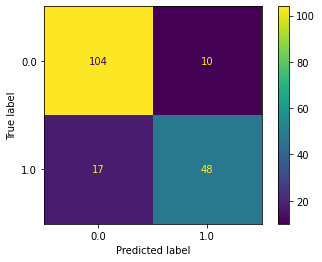

In [24]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto 
# de prueba para el mejor Bosque Aleatorio
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))  

### Regresión Logística

In [25]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Regresión Logística con C = 0.001 y solver = 'newton-cg'
from sklearn.linear_model import LogisticRegression

lrcInicial_model = LogisticRegression(C=0.001, solver='newton-cg')
scores = pd.DataFrame(cross_validate(lrcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los 
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.6309311622464899
score promedio de validación =  0.6293035993740219


,fit_time,score_time,test_score,train_score
0,0.009071,0.001657,0.583333,0.635938
1,0.007641,0.001510,0.611111,0.632812
2,0.007610,0.001517,0.619718,0.638066
3,0.008072,0.001497,0.676056,0.624025
4,0.007060,0.001522,0.591549,0.634945
5,0.007844,0.001539,0.633803,0.627145
6,0.007454,0.001537,0.661972,0.624025
7,0.007526,0.001524,0.633803,0.627145
8,0.007762,0.001756,0.619718,0.638066
9,0.006991,0.001536,0.661972,0.627145


In [26]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros 
# para construir una Regresión Logística para el problema
from sklearn.model_selection import RandomizedSearchCV

parameters = {'C': np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
                              param_distributions = parameters, 
                              return_train_score=True)
lrc_rand.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n", lrc_rand.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Mejores hiperparámetros
 {'solver': 'sag', 'C': 0.12648552168552957}


In [27]:
# quédate con la Regresión Logística con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
lrc_model = lrc_rand.best_estimator_
lrc_model.score(X_test, y_test)

0.8379888268156425

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       114
         1.0       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



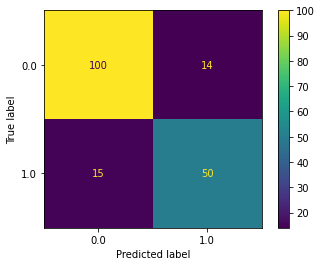

In [28]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto 
# de prueba para la mejor Regresión Logística
ConfusionMatrixDisplay.from_estimator(lrc_model, X_test, y_test)
print(classification_report(y_test, lrc_model.predict(X_test))) 

### Bayes Ingenuo Gaussiano

In [29]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de Bayes Ingenuo Gaussiano
from sklearn.naive_bayes import GaussianNB

gnbc_model = GaussianNB()

scores = pd.DataFrame(cross_validate(gnbc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los 
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.7810545046801872
score promedio de validación =  0.7752738654147107


,fit_time,score_time,test_score,train_score
0,0.005861,0.002696,0.777778,0.776563
1,0.002244,0.001552,0.777778,0.782813
2,0.002160,0.001631,0.732394,0.776911
3,0.002171,0.001545,0.760563,0.783151
4,0.002148,0.001545,0.760563,0.787832
5,0.002166,0.001516,0.760563,0.784711
6,0.002162,0.001539,0.802817,0.781591
7,0.002604,0.001566,0.802817,0.783151
8,0.002145,0.001563,0.802817,0.776911
9,0.002157,0.001539,0.774648,0.776911


              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       114
         1.0       0.75      0.78      0.77        65

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



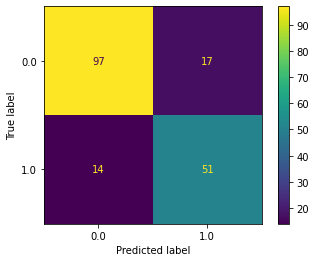

In [30]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto 
# de prueba para Bayes Ingenuo Gaussiano
gnbc_model.fit(X_train, y_train) # No se ha entrenado el modelo

ConfusionMatrixDisplay.from_estimator(gnbc_model, X_test, y_test)
print(classification_report(y_test, gnbc_model.predict(X_test)))  

### Máquina de Vectores de Soporte



In [31]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Máquina de Vectores de Soporte con un parámetro de regularización de
# 0.01 y un kernel polinomial
from sklearn.svm import SVC

svmc_model = SVC(C=0.01, kernel="poly")

scores = pd.DataFrame(cross_validate(svmc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los 
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.64029373049922
score promedio de validación =  0.6321009389671362


,fit_time,score_time,test_score,train_score
0,0.019367,0.002772,0.597222,0.642188
1,0.013883,0.002680,0.611111,0.640625
2,0.014936,0.002697,0.633803,0.645866
3,0.014110,0.002676,0.690141,0.638066
4,0.013813,0.002599,0.605634,0.642746
5,0.013971,0.002581,0.633803,0.633385
6,0.014009,0.002638,0.661972,0.633385
7,0.015324,0.002809,0.633803,0.638066
8,0.014076,0.002842,0.591549,0.644306
9,0.014126,0.002764,0.661972,0.644306


In [32]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros 
# para construir una Máquina de Vectores de Soporte para el problema
parameters = {'C': [0.01, 0.1, 1, 10, 50], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters, 
                         return_train_score=True)
svmc_grid.fit(X_train, y_train)
print("Mejores hiperparámetros\n",svmc_grid.best_params_)

Mejores hiperparámetros
 {'C': 10, 'kernel': 'rbf'}


In [33]:
# quédate con la Máquina de Vectores de Soporte con los mejores hiperparámetros 
# encontrados y despliega su score con los datos del conjunto de prueba.
svmc_model = svmc_grid.best_estimator_
svmc_model.score(X_test, y_test)

0.8715083798882681

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       114
         1.0       0.88      0.75      0.81        65

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



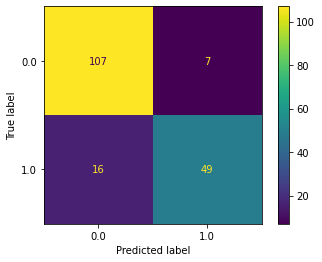

In [34]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto 
# de prueba para la mejor Máquina de Vectores de Soporte
ConfusionMatrixDisplay.from_estimator(svmc_model, X_test, y_test)
print(classification_report(y_test, svmc_model.predict(X_test))) 

## Mejor Modelo de Aprendizaje mediante Curva ROC

<Figure size 432x288 with 0 Axes>

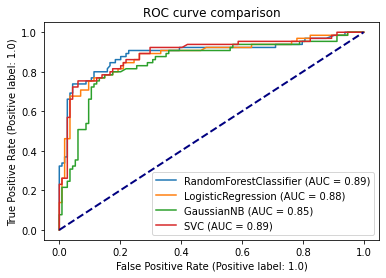

In [36]:
# calcular y mostrar las curvas ROC de cada modelo de aprendizaje
# y sus métricas de área bajo la curva (AUC) sobre el conjunto de prueba
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

##Conclusión: El modelo de Bosque Aleatorio o SVC fue el mejor con un AUC de 0.89